# Red neuronal para detectar  cancer de mama con CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore # el tipo de perceptron a

2025-04-07 09:40:28.142533: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 09:40:28.143099: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 09:40:28.145230: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 09:40:28.150671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744040428.159777   39242 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744040428.16

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import  train_test_split
from sklearn.discriminant_analysis import StandardScaler

## Analisis exploratorio

In [4]:
cancer_data = datasets.load_breast_cancer()

In [5]:
X = pd.DataFrame(data = cancer_data.data, columns = cancer_data.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
Y = cancer_data.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
type(Y[0]) # como es numerico, no debemos darle un tratamiento especial
# hay funciones que no reciben variables categoricas y otras que si

numpy.int64

In [8]:
temp = X.copy()
temp.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Carga del conjunto de datos sobre cáncer de maam incluido en SKlearn

In [9]:
corrmat = temp.corr()

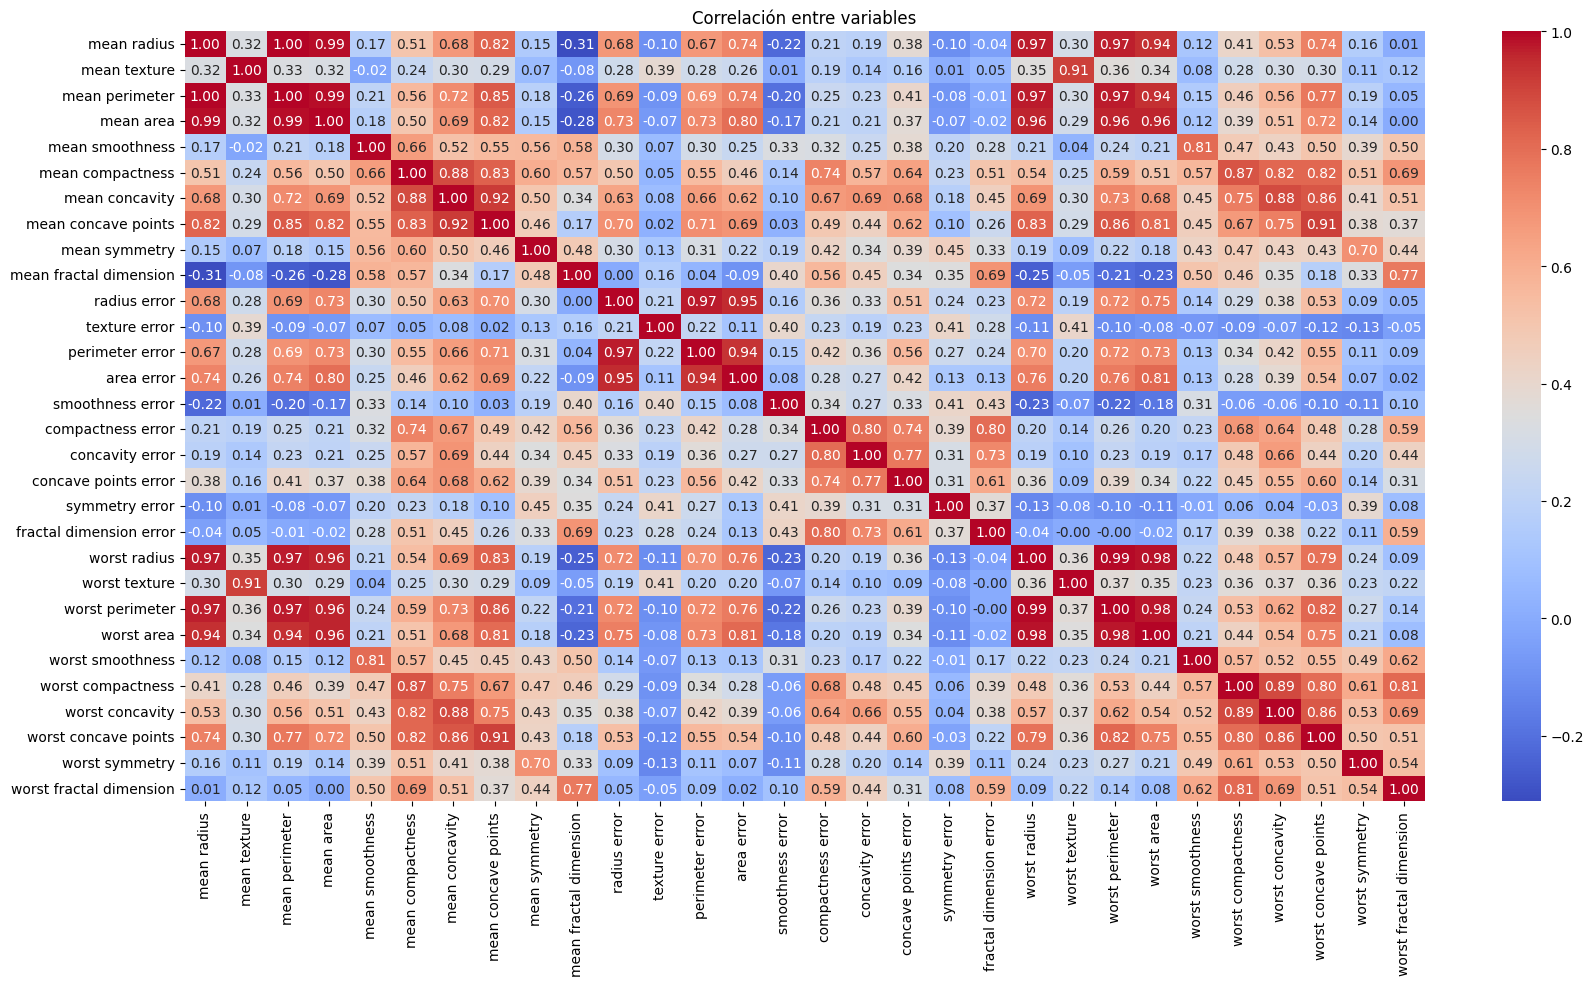

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

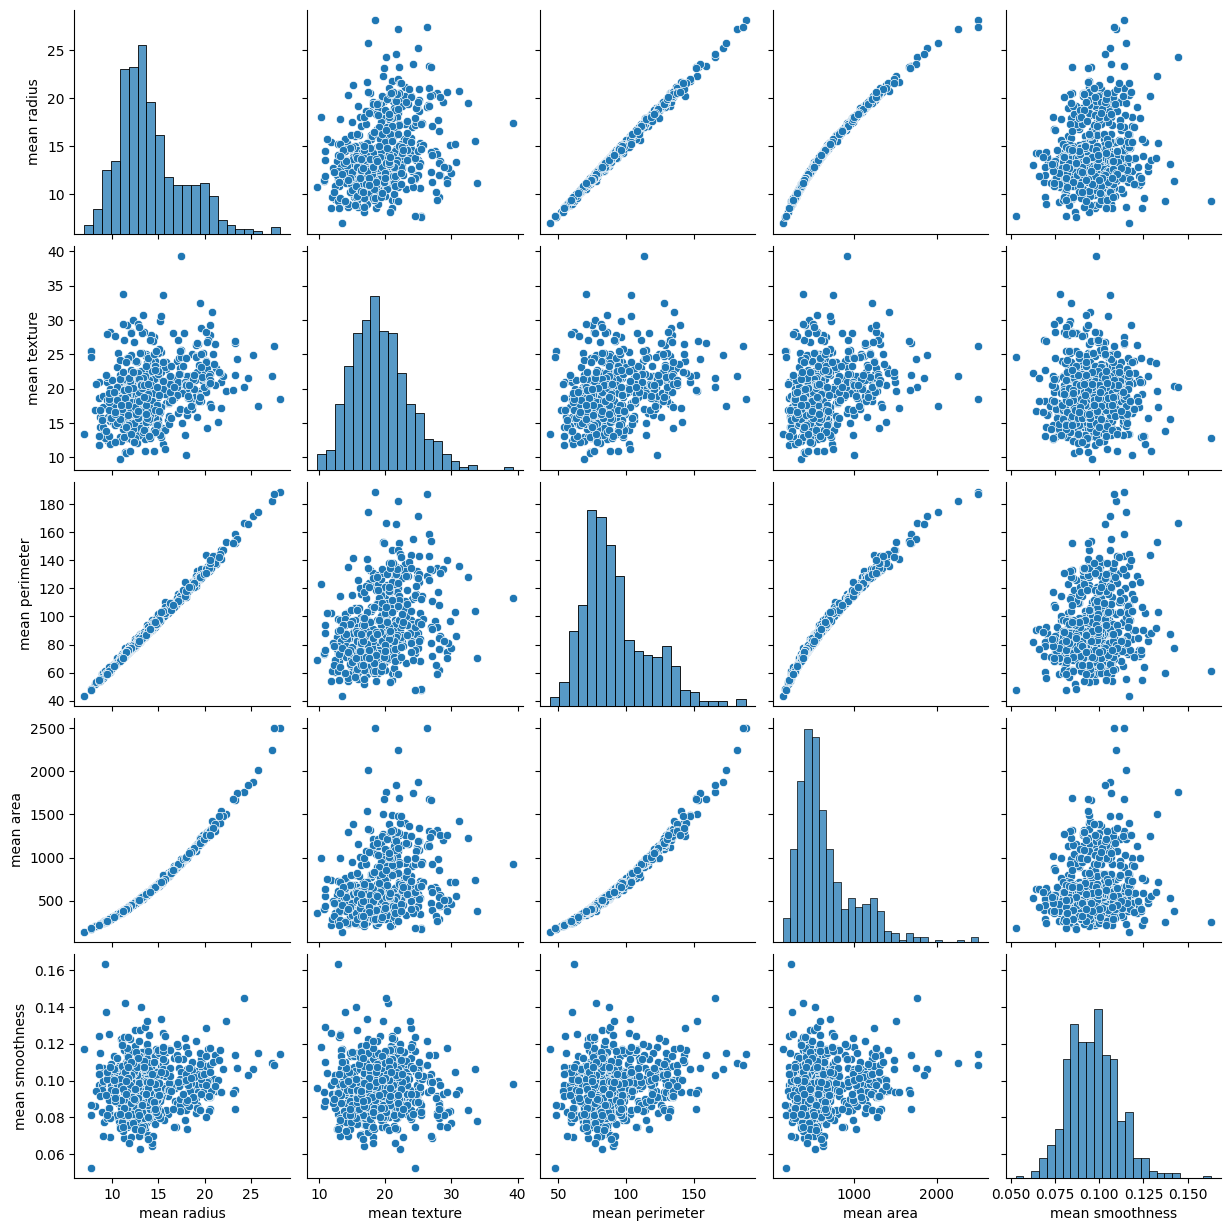

In [11]:
# sns.pairplot(temp); # aca generara TOOODAS LAS GRAFICAS, PERO VA TARDAR MUCHO
columns_to_plot = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"]
sns.pairplot(temp[columns_to_plot]);

## Separación de conjunto de datos para entrenamiento y pruebas

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(512, 30)
(57, 30)


In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.25480383  0.65241465  0.23804349 ...  0.25343762  0.42062373
   0.47696213]
 [ 1.6538891   0.22812653  1.60057602 ...  0.71341983 -0.55397506
   0.41334442]
 [-1.03292567  0.13638856 -1.03522395 ... -0.70332538 -0.02381872
  -0.35449371]
 ...
 [-0.84447745 -1.19151857 -0.84842846 ... -1.12771553 -0.51111811
  -0.75832789]
 [-1.20538435  0.0308899  -1.14969817 ... -0.24892328 -0.43810257
   0.05597883]
 [-0.98438598  1.36567738 -0.98191285 ... -0.79381369  0.81109816
  -0.13376791]]


## Reorganizacion del conjunto de datos a 3-D para utilizarlo en la CNN

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # cambiamos dinamicamente el tamaño
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Preparación del modelo

In [16]:
model = Sequential()

In [17]:
# CAPA 1
model.add(
    Conv1D(
        filters=16, kernel_size=2, activation="relu", input_shape=(X_train.shape[1], 1)
    )
)
model.add(BatchNormalization())
model.add(Dropout(0.2))
# CAPA 2
model.add(Conv1D(32, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# CAPA 3
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

# CAPA 4
model.add(Dense(1, activation="sigmoid"))  # salida binaria

/mnt/data/Datos/url/url-notas/docs/0-RES/IA/jupyter/jupytervenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-07 09:40:32.729188: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-04-07 09:40:32.729219: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-07 09:40:32.729225: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: debf-bi

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 16)         │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        28,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,033 (117.32 KB)

 Trainable params: 29,937 (116.94 KB)

 Non-trainable params: 96 (384.00 B)

In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [20]:
history = model.fit(
    X_train,
    y_train,
    epochs=35,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=32,
)
# Evaluamos el modelo

Epoch 1/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6409 - loss: 0.7264 - val_accuracy: 0.8421 - val_loss: 0.6333
Epoch 2/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4484 - val_accuracy: 0.8947 - val_loss: 0.5696
Epoch 3/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8781 - loss: 0.3374 - val_accuracy: 0.8772 - val_loss: 0.5151
Epoch 4/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8848 - loss: 0.2962 - val_accuracy: 0.8772 - val_loss: 0.4677
Epoch 5/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9120 - loss: 0.2402 - val_accuracy: 0.9123 - val_loss: 0.4260
Epoch 6/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.1932 - val_accuracy: 0.9123 - val_loss: 0.3874
Epoch 7/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.2177 - val_accuracy: 0.9298 - val_loss: 0.3511
Epoch 8/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.1405 - val_accuracy: 0.9298 - val_loss

## Grafica de precisión y pérdida

## Intentando aplicar red convolucional multicapa para clasificar cancer

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8, ),
    max_iter=2000,
    random_state=26,
    activation="relu",
    solver="adam",
    tol=1e-5,
)


# Reshape X_train and X_test back to 2D arrays as MLPClassifier expects 2D input
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

mlp.fit(X_train_2d, y_train)

print(f"numero de capas en la red {len(mlp.coefs_)}")
print(f"numero de neuronas en las capas ocultas {mlp.hidden_layer_sizes[0]}")


numero de capas en la red 4
numero de neuronas en las capas ocultas 16


In [22]:
# obtener pesos y bias

w = mlp.coefs_
b = mlp.intercepts_
print("\nPesos:", w, "\n\nSesgo (bias):", b, "\n\nEpocas:", mlp.n_iter_)


Pesos: [array([[-1.68861555e-01,  9.60063565e-02,  2.50149893e-01,
         1.96994708e-01,  2.27818445e-01, -3.35065871e-01,
        -7.27350216e-02,  4.74080042e-02,  2.56797488e-01,
        -2.14911687e-01, -2.54974720e-01,  1.08268234e-02,
        -2.08839754e-01,  3.22275761e-01, -7.84878491e-02,
        -3.09397760e-01],
       [ 3.18088688e-01,  3.21132747e-01,  1.88933776e-01,
        -5.64091469e-02,  2.87167759e-01, -9.91760836e-02,
         3.54795666e-01, -1.95607025e-01,  4.84584927e-01,
         3.66067280e-01, -3.09156606e-02, -3.79735342e-01,
         2.15514131e-01, -5.79268933e-03, -1.45855687e-01,
         5.75092847e-02],
       [ 2.52227418e-01,  1.79455307e-01, -9.64539901e-02,
         1.16375472e-01, -2.05207103e-01, -3.76488548e-01,
         1.45256272e-01, -1.43313898e-02,  1.24655593e-01,
         2.57518213e-01, -3.13381241e-01, -1.19329879e-01,
         2.94441214e-01,  4.34326761e-01,  4.26581486e-01,
        -4.77099966e-01],
       [ 2.46927533e-01,  2.

In [23]:
from sklearn.metrics import classification_report, accuracy_score

# realizar predicciones
y_pred2 = mlp.predict(X_test_2d)
eficiencia2 = accuracy_score(y_test, y_pred2)
print(f"Eficiencia del perceptron multicapa: {eficiencia2 * 100:.2f}%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred2))

Eficiencia del perceptron multicapa: 91.23%

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.97      0.89      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57

